# Лабораторная работа 8.11
## Вариант 4
## Сидельников Станислав Игоревич

## Решение системы уравнений

$ x' = z $,

$ y' = u $,

$ z' = \frac{x}{(x^2 + y^2)3/2} $

$ u' = - \frac{y}{(x^2 + y^2)3/2} $

## Начальные условия

$ x(0) = 0.5 $

$ y(0) = z(0) = 0 $

$ u(0) = \sqrt{3} \simeq 1.73 $

$ 0 <= t <= 20$

In [13]:
import numpy as np              
import matplotlib.pyplot as plt

In [14]:

# начальные значения
y_0 = np.array([0.5, 0, 0, 1.73])

# границы интервала времени
t_0 = 0
t_1 = 20


def f(y):
    
    res = np.copy(y)
    
    res[0] = y[2]
    res[1] = y[3]
    res[2] = - 1.0 * y[0] / ((y[0] ** 2 + y[1] ** 2) ** 1.5)
    res[3] = - 1.0 * y[1] / ((y[0] ** 2 + y[1] ** 2) ** 1.5)
    
    return res

In [15]:
f(y_0)

array([-0.        , 26.        , -1.66666667])

In [16]:

def step(y_n):
    
    k = np.arange(b.size * y_n.size, dtype = float).reshape(b.size, y_n.size)
    
    for i in range(b.size):
        
        y_i = np.copy(y_n)
        
        for j in range(i):
            y_i += h * a[i][j] * k[j] 
            
        k[i] = f(np.copy(y_i))

    for i in range(b.size):
        y_n += h * b[i] * k[i]
        
    return y_n
        

[1. 1. 1.]
[2.13310762 4.47142018 1.11389889]
[ 6.54252755 13.73118671  4.18019741]
[16.68481396 27.18349235 26.20646018]
[15.36620011  1.11303753 46.75784334]
[ 1.19827299 -8.86719773 32.45474023]
[-4.83321401 -8.06128111 26.67318955]
[-7.04936183 -8.7474865  24.89008216]
[ -8.6355093  -10.09563918  25.64672605]
[ -9.69220069 -10.15778173  28.03033906]
[-9.37857001 -8.35703379 29.36232533]
[-8.07861859 -6.77019936 28.18342435]
[-7.17339714 -6.78342378 25.97599215]
[-7.36206031 -8.09977411 24.55428241]
[-8.48479326 -9.84967704 25.08112225]
[ -9.67232428 -10.43194463  27.51743363]
[-9.64389509 -8.80862231 29.44101522]
[-8.34628633 -6.87301663 28.67062019]
[-7.19910069 -6.53617872 26.37594711]
[-7.14634299 -7.69458546 24.573314  ]
[-8.17349993 -9.56202368 24.62070205]
[ -9.54096363 -10.62853973  26.90562089]
[-9.87110396 -9.3292964  29.37932605]
[-8.66712917 -7.08277214 29.15916835]
[-7.28919088 -6.33213095 26.86518988]
[-6.9595736  -7.27246924 24.70312218]
[-7.83460909 -9.17965125 24.22

<IPython.core.display.Javascript object>


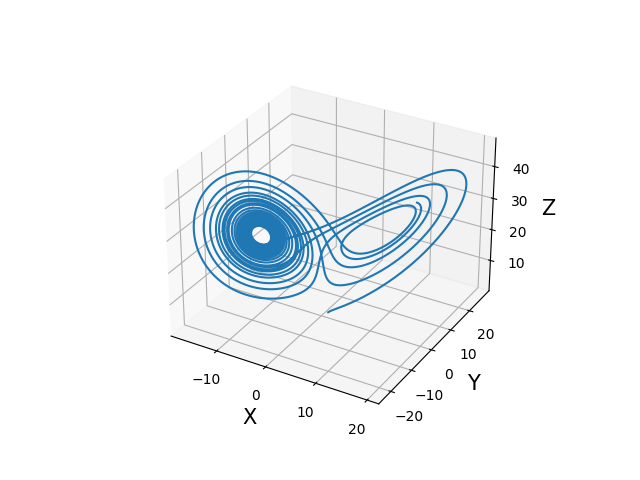

In [17]:
# первый порядок

b = np.array([1.0])
c = np.array([0.0])
a = np.array([np.array([0.0])])

# второй порядок

b = np.array([0.0, 1.0])
c = np.array([0.0, 0.5])
a = np.array([np.array([0.0, 0.0]),
              np.array([0.5, 0.0])
             ])

## третий порядок аппроксимации
b = np.array([1.0 / 6.0, 2.0 / 3.0, 1.0 / 6.0])
c = np.array([0.0, 0.5, 1.0])
a = np.array([np.array([0.0, 0.0, 0.0]),
              np.array([0.5, 0.0, 0.0]),
              np.array([0.0, 1.0, 0.0])])
    
## четвертый порядок аппроксимации
b = np.array([1.0 / 6.0, 1.0 / 3.0, 1.0 / 3.0, 1.0 / 6.0])
c = np.array([0.0, 0.5, 0.5, 1.0])
a = np.array([np.array([0.0, 0.0, 0.0, 0.0]),
              np.array([0.5, 0.0, 0.0, 0.0]),
              np.array([0.0, 0.5, 0.0, 0.0]),
              np.array([0.0, 0.0, 1.0, 0.0])
])


# шаг в итерационном процессе
h = 0.001
        
def iter_step(h):
    y_trace = np.array([np.copy(y_0)])
    for i in range(round((t_1 - t_0) / h)):
        y_trace = np.append(y_trace, [step(np.copy(y_trace[i]))], axis = 0)

    for i in range(y_trace.size // 4):
        if(i % 100 == 0):
            print(y_trace[i])
            
    return y_trace

def plot_trajectory():
    %matplotlib notebook
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(y_trace[:, 0], y_trace[:, 1], y_trace[:, 2], label='solution')
    ax.set_xlabel("X", fontsize=15)
    ax.set_ylabel("Y", fontsize=15)
    ax.set_zlabel("Z", fontsize=15)
    plt.draw()
    plt.show()
    

y_trace = iter_step(0.001)
plot_trajectory()

In [12]:
y_trace = iter_step(0.005)
plot_trajectory()

KeyboardInterrupt: 

In [ ]:
y_trace = iter_step(0.05)
plot_trajectory()

[0.500008   0.00345998 0.00799972 1.72997232]
[0.51996158 0.17422267 0.37635678 1.66784087]
[0.57123925 0.33527739 0.62923357 1.55187809]


<IPython.core.display.Javascript object>


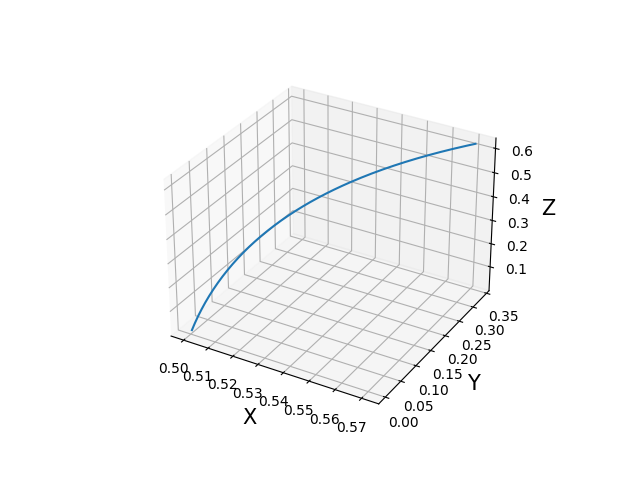

In [58]:
y_trace = iter_step(0.1)
plot_trajectory()